In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV , StratifiedKFold, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,root_mean_squared_error
from sklearn.metrics import r2_score , mean_absolute_error
from scipy.stats import skew

In [244]:
file_input = r"C:\Users\hkomatlapalli\OneDrive - Government Of Prince Edward Island\Desktop\Project\train.csv"

df_train = pd.read_csv(file_input)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [245]:
file_input = r"C:\Users\hkomatlapalli\OneDrive - Government Of Prince Edward Island\Desktop\Project\test.csv"

df_test = pd.read_csv(file_input)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [246]:
# Drop Id's from dataset

df_train = df_train.drop("Id", axis = 1)
df_test = df_test.drop("Id", axis = 1)
df_train


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [247]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

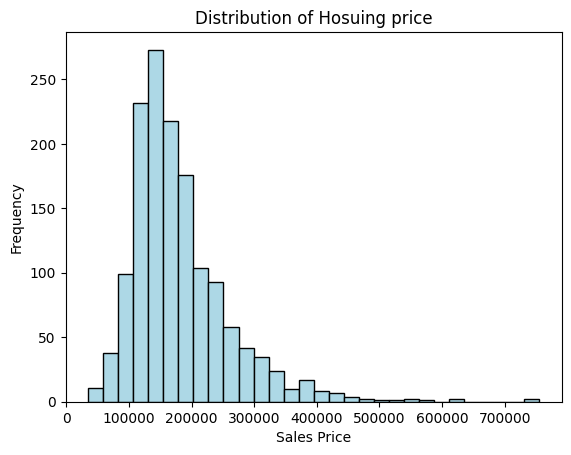

In [248]:
df_train["SalePrice"].plot.hist( bins= 30, color = 'lightblue', edgecolor = 'black')
plt.title(f'Distribution of Hosuing price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency') 
plt.show()

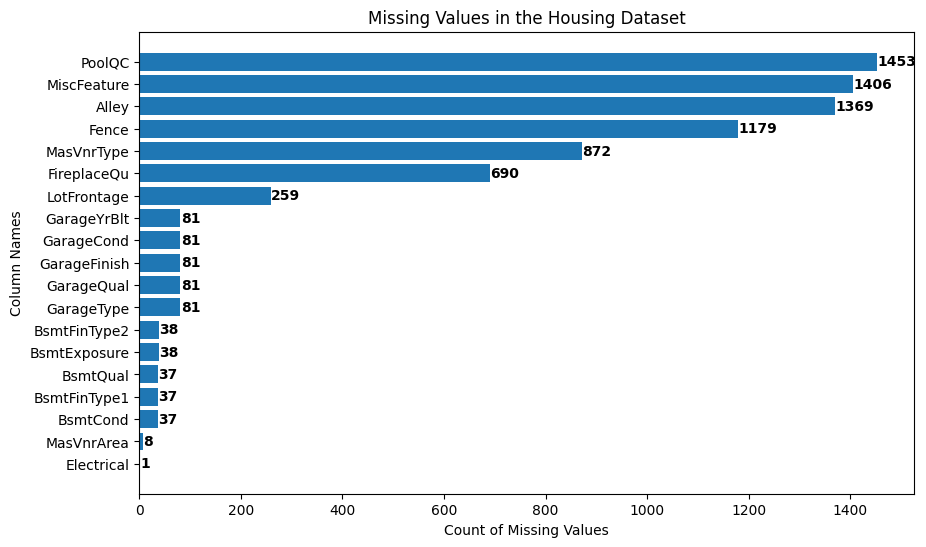

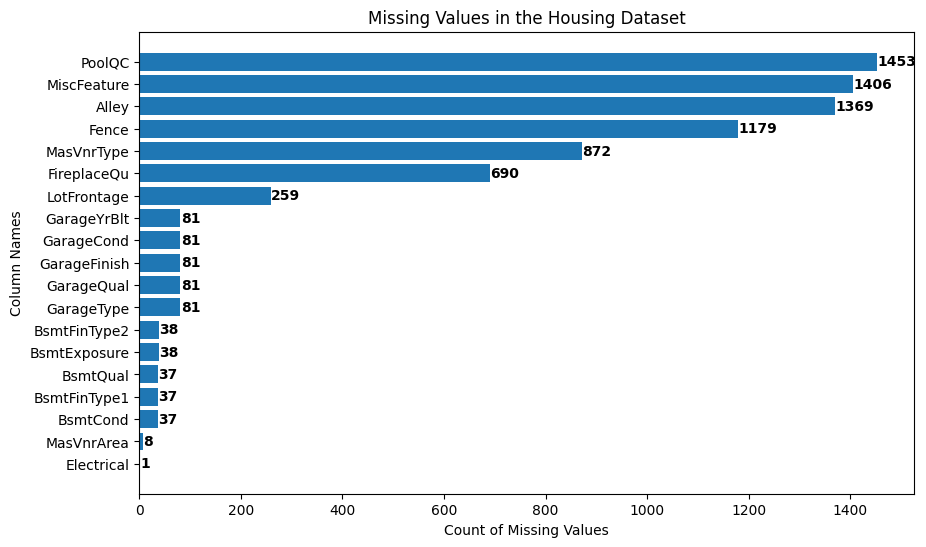

In [249]:
# Visualize the number of missing values in each column

def plot_null_counts(df):

    null_counts = df_train.isna().sum()
    null_counts = null_counts[null_counts>0]

    null_counts_sort = null_counts.sort_values(ascending= True)

    fig,ax = plt.subplots(figsize= (10,6))

    bars = ax.barh( y= null_counts_sort.index, width= null_counts_sort.values )
    for i, v in enumerate(null_counts_sort.values):
        ax.text(v + 0.5, i, str(v), color='black', fontweight='bold', va='center')
   

    plt.title("Missing Values in the Housing Dataset")
    plt.xlabel("Count of Missing Values")
    plt.ylabel("Column Names")
    plt.show()

plot_null_counts(df_train)

plot_null_counts(df_test)




In [250]:
# To understand weather we need to fill mean or median 
df_train.select_dtypes(include= ["number"]).describe().transpose()

# Unable to find any relation?

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

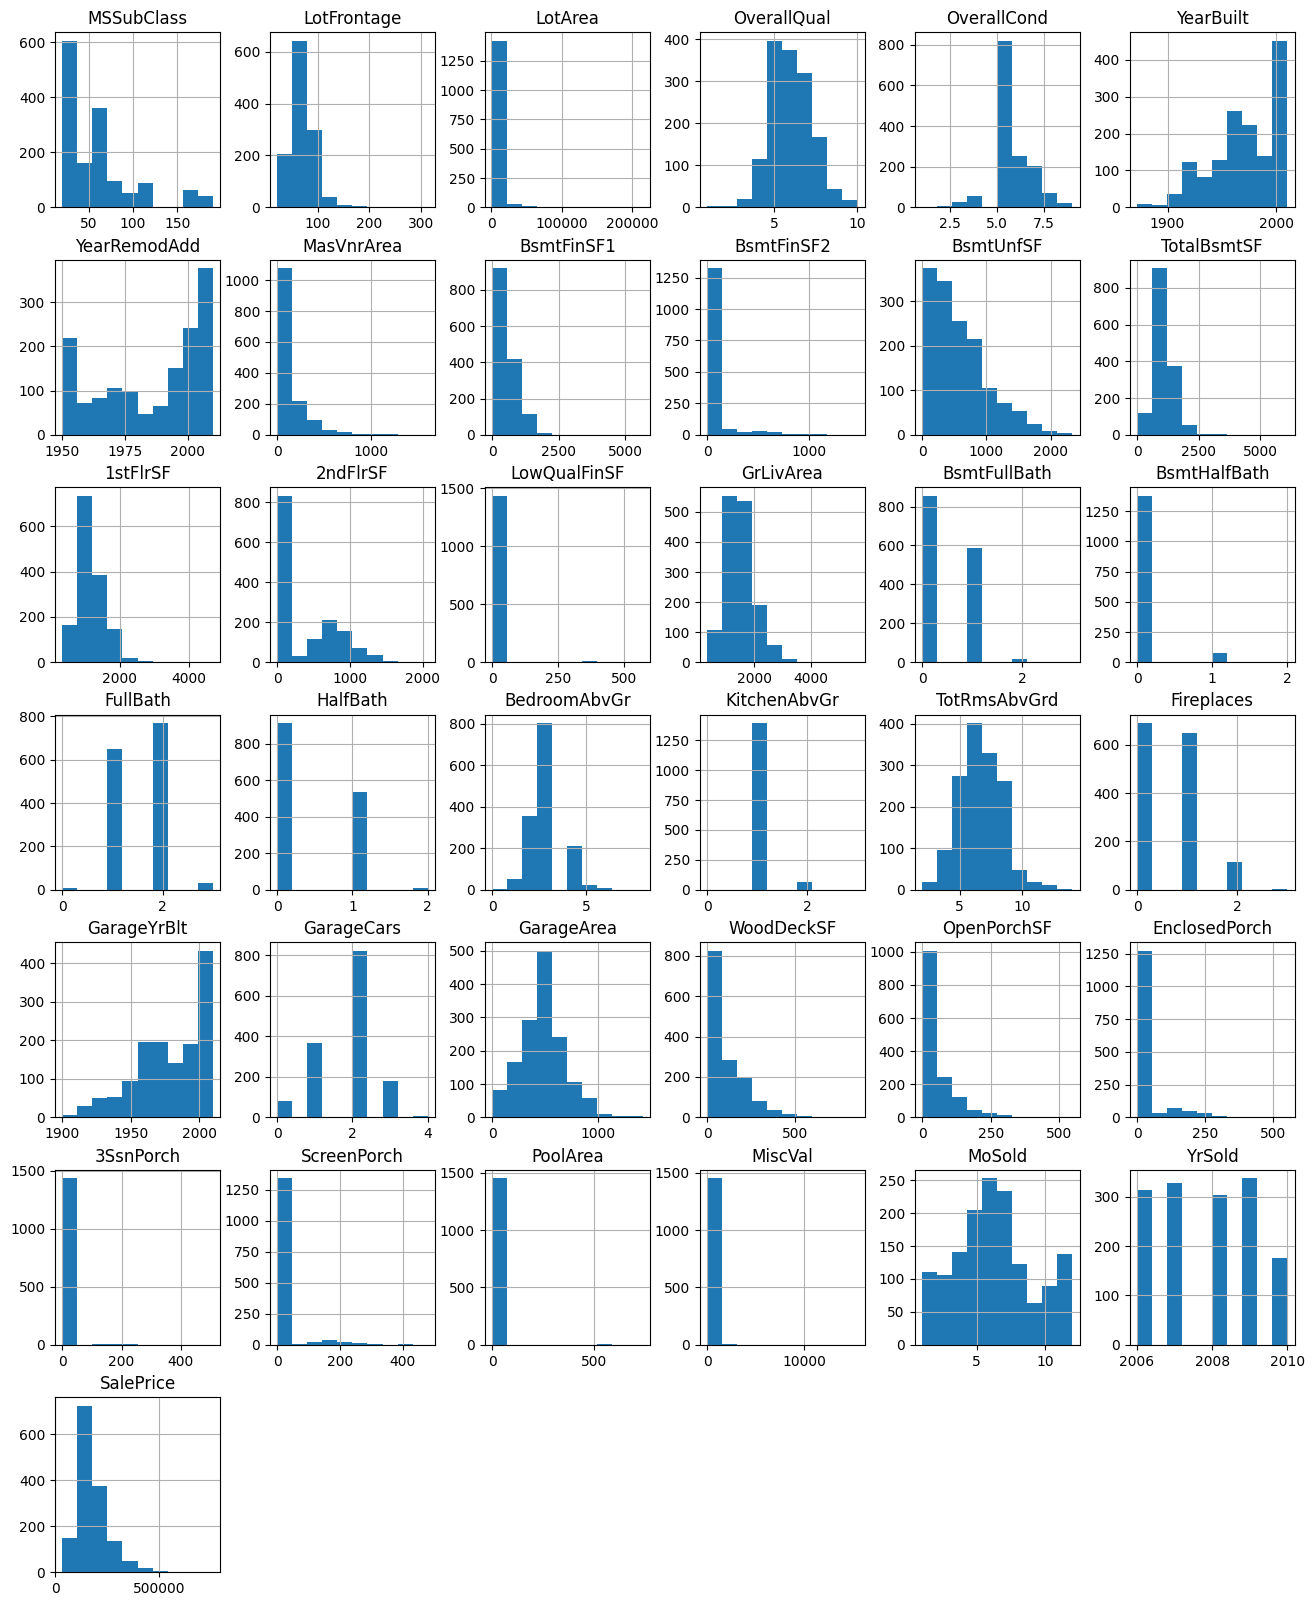

In [251]:
df_train.select_dtypes(include= ["number"]).hist(figsize= (16,20))

In [252]:
def cleandataset(df):
    num_cols = df.select_dtypes(include= ['float64', 'int64']).columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())
    
    cat_cols = df.select_dtypes(include= ['object', 'category']).columns # If there are structure related they are not there we cant simply fill any value
    for col in cat_cols:
        df[col] = df[col].fillna('None')
    
    return df

train_data = cleandataset(df_train)

test_data = cleandataset(df_test)

print("Total NaNs in Train:", train_data.isna().sum().sum())


Total NaNs in Train: 0


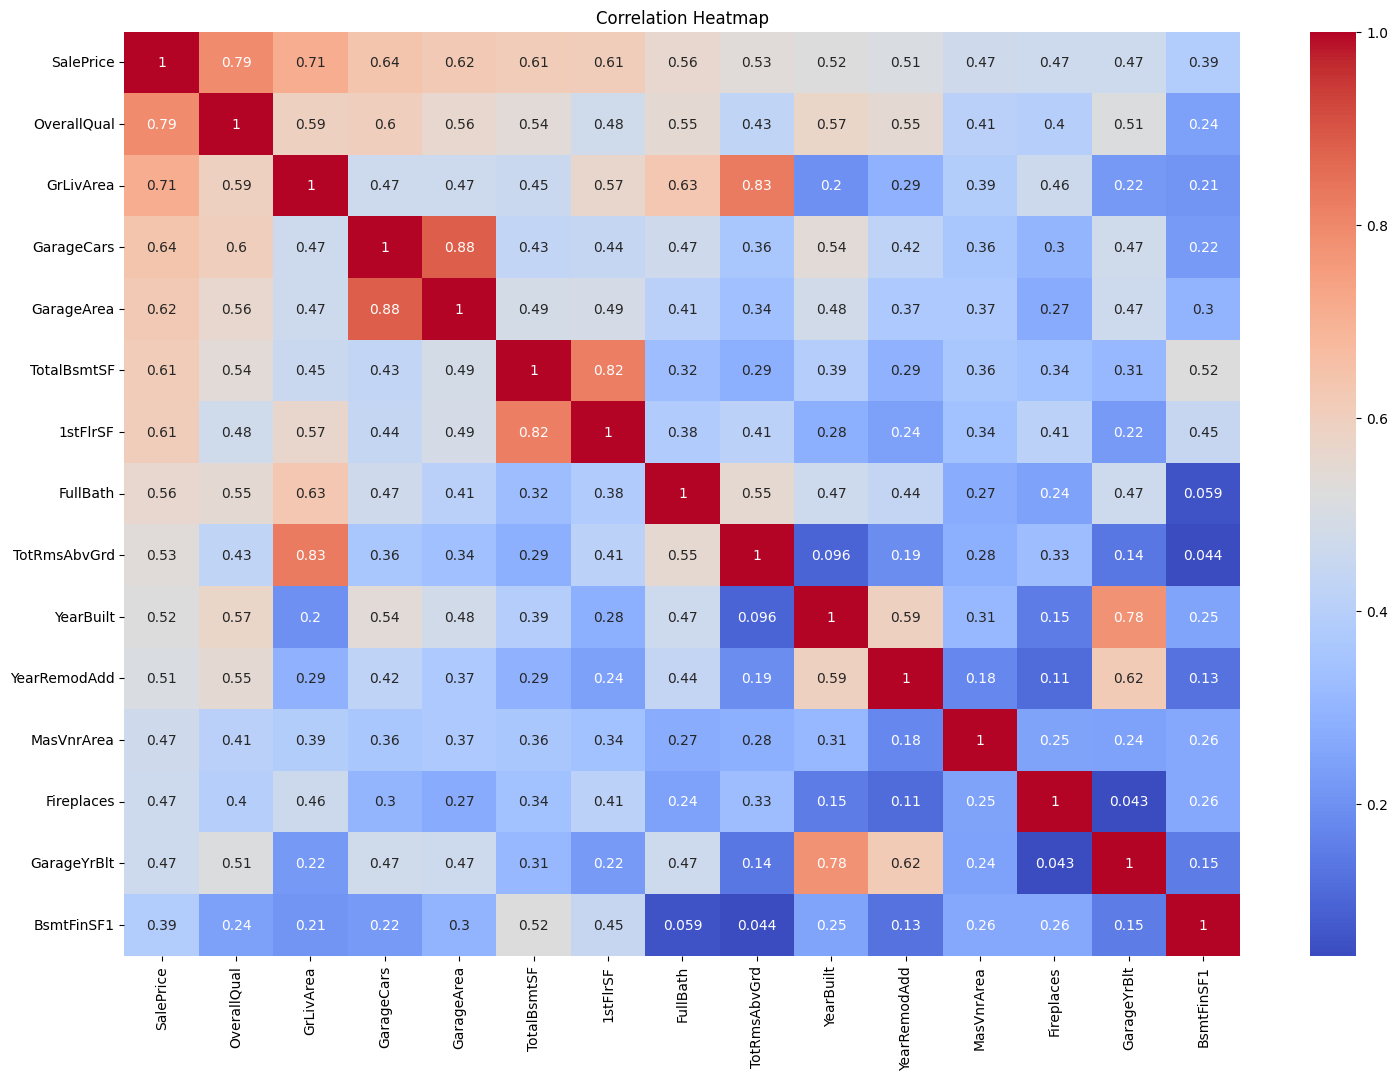

In [253]:
corr = train_data.corr(numeric_only= True)
top_corr = corr["SalePrice"].sort_values(ascending = False).head(15)

top_10_corr = train_data[top_corr.index]
plt.figure(figsize=(18, 12))
sns.heatmap(top_10_corr.corr(), annot= True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

C:\Users\hkomatlapalli\AppData\Local\Temp\ipykernel_34504\1295991089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(train_data, x = "GarageCars", y = "SalePrice" , legend= 'auto', palette= "Spectral")


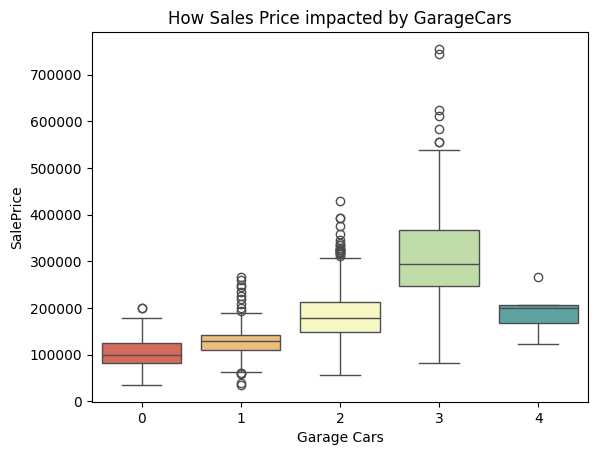

In [254]:
#Explore Multicolinearty features

sns.boxplot(train_data, x = "GarageCars", y = "SalePrice" , legend= 'auto', palette= "Spectral")

plt.title("How Sales Price impacted by GarageCars")
plt.xlabel("Garage Cars")
plt.ylabel("SalePrice")

plt.show()

#remove Garage Cars 4

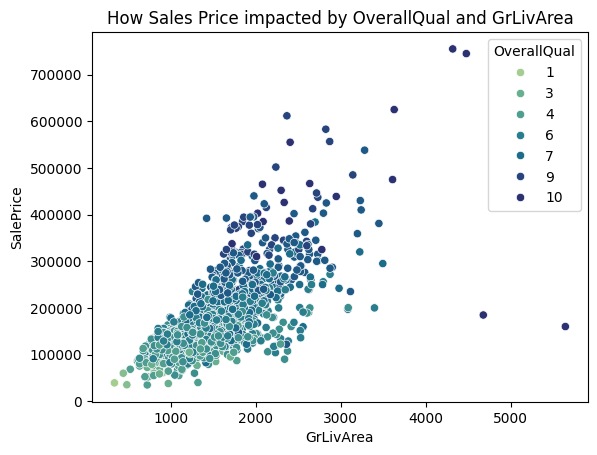

In [255]:
sns.scatterplot(train_data, x = "GrLivArea", y = "SalePrice", hue = "OverallQual", legend= 'auto', palette= "crest")

plt.title("How Sales Price impacted by OverallQual and GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

plt.show()

# Remove GrLivArea > 4000

In [256]:
# Feature Engineering

def featureengineering(df):
    df["TotalBath"] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
    df["HasPool"] = (df["PoolArea"]>0).astype('int')
    df["Has2ndFloor"] = (df["2ndFlrSF"]>0).astype('int')
    df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
    df['HasBsmt'] = (df['TotalBsmtSF'] > 0).astype(int)
    df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)
    df['TotalRooms'] = df['TotRmsAbvGrd'] + df['BedroomAbvGr'] + df['KitchenAbvGr']
    df['BuildingAge'] = df['YrSold'] - df['YearBuilt']
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
    df['IsNew'] = (df['BuildingAge'] <= 2).astype(int)    
    df['IsRemodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)
    df['TotalPorch'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
    df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"] + df["GrLivArea"]
    return df

df_train_features = featureengineering(train_data)
df_test_features = featureengineering(test_data)


C:\Users\hkomatlapalli\AppData\Local\Temp\ipykernel_34504\3369728318.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = target_corr.values , y = target_corr.index, orient= "h", palette = 'rocket')


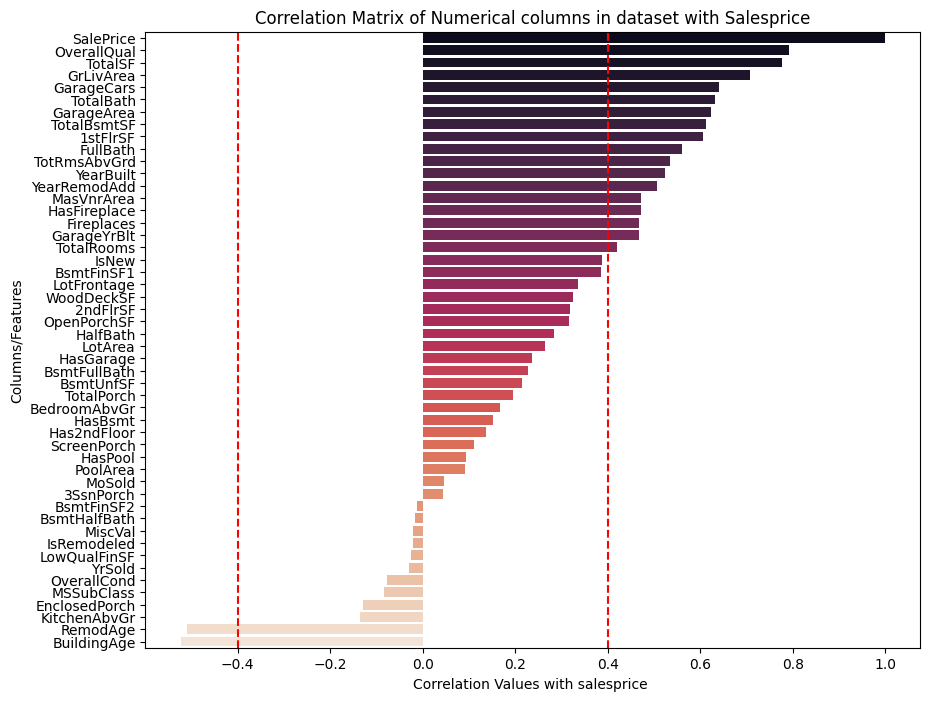

In [257]:
#correlation analysis

correlation_matrix = df_train_features.select_dtypes(include= 'number').corr()
target_corr  = correlation_matrix["SalePrice"].sort_values( ascending= False) #picking up that entire row

plt.figure(figsize = (10,8))
sns.barplot(x = target_corr.values , y = target_corr.index, orient= "h", palette = 'rocket')
plt.axvline( x = 0.4, ls = '--', color = 'r')
plt.axvline( x = -0.4, ls = '--', color = 'r')
plt.title("Correlation Matrix of Numerical columns in dataset with Salesprice")
plt.xlabel("Correlation Values with salesprice ")
plt.ylabel("Columns/Features")
plt.show()


In [258]:
# Display correlations of engineered features
engineered_features = [
    "TotalSF",
    "TotalBath",
    "HasFireplace",
    "IsNew",
    "HasGarage",
    "TotalPorch",
    "HasBsmt",
    "Has2ndFloor",
    "HasPool",
    "RemodAge"
]

corr = df_train_features[engineered_features].corrwith(df_train_features["SalePrice"])
print("Correlation of engineered features:")
print(corr.sort_values(ascending=False))

Correlation of engineered features:
TotalSF         0.777123
TotalBath       0.631731
HasFireplace    0.471908
IsNew           0.388531
HasGarage       0.236832
TotalPorch      0.195739
HasBsmt         0.152829
Has2ndFloor     0.137656
HasPool         0.093708
RemodAge       -0.509079
dtype: float64


In [259]:
#Features to Convert

def features_convert(df):
       ordinalcols = ["PoolQC","GarageCond","GarageQual","FireplaceQu","KitchenQual","HeatingQC","BsmtCond","BsmtQual","ExterCond","ExterQual"]
       numeric_con_ordinalcols = { "Ex" : 5, "Gd": 4, "TA":3, "Fa":2, "Po":1,"None": 0, "NA": 0, "None" : 0 }

       for col in ordinalcols:
              df[col] = df[col].map(numeric_con_ordinalcols)
       
       ordinalcoltype2 = ["BsmtFinType1","BsmtFinType2"]
       numeric_con_ordinalcols1 = { "GLQ": 6, "ALQ" : 5, "BLQ" : 4, "Rec" : 3, "LwQ" : 2, "Unf" : 1, "NA" : 0, "None" : 0 }

       for col in ordinalcoltype2:
              df[col] = df[col].map(numeric_con_ordinalcols1)
       
       ordinalcoltype3 = ["Functional"]
       numeric_con_ordinalcols2 = {"Typ" : 7, "Min1" : 6, "Min2" : 5, "Mod" : 4, "Maj1": 3, "Maj2" : 2, "Sev": 1, "Sal": 0, "None" : 0 }

       for col in ordinalcoltype3:
              df[col] = df[col].map(numeric_con_ordinalcols2)       
       
       ordinalcoltype4 = ["Fence"]
       numeric_con_ordinalcols3 = { "GdPrv": 4,"MnPrv" : 3, "GdWo" : 2, "MnWw" : 1, "NA": 0, "None" : 0 }
       for col in ordinalcoltype4:
              df[col] = df[col].map(numeric_con_ordinalcols3)         

       return df


df_train_data = features_convert(df_train_features)
df_test_data = features_convert(df_test_features)

In [260]:
# Remove Skewness: Most of the Numerical features are right skewed
numerical_features = df_train_data.select_dtypes(include= ['float64', 'int64']).columns

skew_values = df_train_data[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skew_features = skew_values[skew_values > 0.75].index

print("Skewed features count:", len(skew_features))

# Model should generalize well to unseen data for test dataset skewness is not applied

# Skew Correction

for col in skew_features:
    if col != 'SalePrice':
        df_train_data[col] = np.log1p(df_train_data[col])
        df_test_data[col]  = np.log1p(df_test_data[col])

print("After skew correction:", df_train_data.shape, df_test_data.shape)

Skewed features count: 31
After skew correction: (1460, 93) (1459, 92)


In [261]:

nominal_col = df_train_data.select_dtypes(include= 'object').columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
df_nominal_train_scaled = encoder.fit_transform(df_train_data[nominal_col])
df_nominal_train = pd.DataFrame(df_nominal_train_scaled, columns = encoder.get_feature_names_out())
Train = pd.concat([(df_train_data.drop(nominal_col, axis =1)), df_nominal_train], axis = 1, join = 'outer')

nominal_col_test = df_test_data.select_dtypes(include= 'object').columns
df_nominal_test_scaled = encoder.transform(df_test_data[nominal_col_test])
df_nominal_test = pd.DataFrame(df_nominal_test_scaled, columns = encoder.get_feature_names_out())
Test = pd.concat([(df_test_data.drop(nominal_col_test, axis= 1)), df_nominal_test], axis = 1, join = 'outer')

print(f"train_df: \n{Train}")
print(f"Test_df: \n {Test}")


#dont not fit test set as if there is no specific feature in dataset onehotencoding might not intrepret as correctly, if I predict on test set it will be completely nosnsense.
#When you ran fit_transform on your Test set separately, you told the encoder: "Forget everything you learned from the Training houses; start a brand new dictionary for these Test houses."

train_df: 
      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       4.110874     4.189655  9.042040            7            5       2003   
1       3.044522     4.394449  9.169623            6            8       1976   
2       4.110874     4.234107  9.328212            7            5       2001   
3       4.262680     4.110874  9.164401            7            5       1915   
4       4.110874     4.442651  9.565284            8            5       2000   
...          ...          ...       ...          ...          ...        ...   
1455    4.110874     4.143135  8.976894            6            5       1999   
1456    3.044522     4.454347  9.486152            6            6       1978   
1457    4.262680     4.204693  9.109746            7            9       1941   
1458    3.044522     4.234107  9.181735            5            6       1950   
1459    3.044522     4.330733  9.204121            5            6       1965   

      YearRemodAdd  MasVnrAr

In [262]:
Train, Test = Train.align(Test, join='left', axis=1, fill_value=0)

print({Train.shape})
print({Test.shape})

{(1460, 255)}
{(1459, 255)}


In [263]:
# remove outliers

Train = Train.drop(Train[(Train["GrLivArea"] > 4000) | (Train["GarageCars"] == 4)].index)

 # dont remove outliners from test set
Train.shape

(1455, 255)

In [264]:
#Train–Test Split & Target Transformation + Cross-Validation

y = np.log1p(Train["SalePrice"])

X = Train.drop("SalePrice", axis=1)

print("X:", X.shape)
print("y:", y.shape)

X: (1455, 254)
y: (1455,)


In [265]:
kfold = KFold(n_splits= 5, shuffle= True, random_state= 42)# Not required for Stratified K fold as already Skewness function is applied


In [266]:
scaler = StandardScaler().set_output(transform="pandas") # Forces output to be a DataFrame
X_scaled = scaler.fit_transform(X)

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [268]:
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kfold))
    return rmse.mean()



In [269]:
Linear_model = LinearRegression()
Linear_model.fit(X_train,y_train)
y_predict = Linear_model.predict(X_train)
rmse = root_mean_squared_error(y_train,y_predict)
print("Linear Regression RMSE:",rmse)
# Might be same train data set,I am just splitting data into train and test data set.

Linear Regression RMSE: 0.09245000032842479


In [270]:
print("Linear Regression Features:",Linear_model.feature_names_in_[:15])

Linear Regression Features: ['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'ExterQual' 'ExterCond'
 'BsmtQual' 'BsmtCond' 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2']


In [271]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train,y_train)
y_pred_ridge = ridge_reg.predict(X_train)
print("Ridge Regression RMSE:",root_mean_squared_error(y_train,y_pred_ridge))

Ridge Regression RMSE: 0.09260565815621688


In [272]:
lasso = Lasso(alpha=0.0005, max_iter=5000)
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_train)
print("LASSO RMSE:", root_mean_squared_error(y_train,y_pred_lasso))

LASSO RMSE: 0.09397776439216335


In [273]:
#Random Forest
rf = RandomForestRegressor(random_state=42)

param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 3, 10, 20],
'min_samples_split': [2, 5]
}

gv_rf = grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_root_mean_squared_error')

gv_rf.fit(X_train, y_train)

print("Best Validated RMSE:", -grid_search.best_score_)

#For most models, find the maximum, but for RMSE, find the minimum." To keep the code simple and universal, they just multiply the RMSE by $-1$. Now, the computer can treat it like any other score: it just looks for the highest number.

Best Validated RMSE: 0.14098061613591029


In [274]:
#XGB 
xgb = XGBRegressor(booster='gbtree')

param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6]
}

# Run the search
gv_XGB = GridSearchCV(xgb, param_grid, cv=3, scoring='neg_root_mean_squared_error')
gv_XGB.fit(X_train, y_train)

print("Best Score (RMSE):", -gv_XGB.best_score_)

Best Score (RMSE): 0.13093488756846014


In [275]:
base_models = [
    ('rf', RandomForestRegressor(random_state=42)),        #
    ('xgb', XGBRegressor(max_depth=3)),    # The gradient booster    
]
meta_learner = Ridge(alpha=1.0)
stack = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5,            # Internally cross-validates to train the meta-learner
    passthrough=False # If True, the meta-learner also sees the original features
)

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
val_rmse = root_mean_squared_error(y_test, y_pred)
print(f"Validation RMSE: {val_rmse}")


Validation RMSE: 0.12617756468178729


In [279]:

# Test on Testing dataset
X_test = Test.drop(['SalePrice'], axis=1, errors='ignore')

scaler = StandardScaler().set_output(transform="pandas") # Forces output to be a DataFrame
X_scaled_test = scaler.fit_transform(X_test)

y_test_pred = stack.predict(X_scaled_test)

#convert back from log saleprice to real values

final_preds = np.expm1(y_test_pred)

predictions = pd.DataFrame({"ID": Test.index,
                            "SalePrice": final_preds})
predictions.head(10)

,ID,SalePrice
0,0,124453.269491
1,1,156796.742176
2,2,170223.490359
3,3,173973.913241
4,4,178823.661345
5,5,164634.619326
6,6,159977.254223
7,7,161154.361214
8,8,164882.112333
9,9,117283.699540


In [283]:
file_input = r"C:\Users\hkomatlapalli\OneDrive - Government Of Prince Edward Island\Desktop\Project\test.csv"

test_raw = pd.read_csv(file_input)
test_raw.head()

predictions_original = pd.DataFrame({
    "Id": test_raw["Id"],     # Correct ID mapping
    "SalePrice": final_preds
})
predictions_original.head(10)

,Id,SalePrice
0,1461,124453.269491
1,1462,156796.742176
2,1463,170223.490359
3,1464,173973.913241
4,1465,178823.661345
5,1466,164634.619326
6,1467,159977.254223
7,1468,161154.361214
8,1469,164882.112333
9,1470,117283.699540
